In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as stats
from scipy import stats
from wordcloud import WordCloud
import plotly.express as px

In [174]:
df = pd.read_csv(r"C:\Users\ATOnile\Downloads\Mall_Customers.csv")

In [176]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data = df.iloc[:,3:5].values


In [64]:
data


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

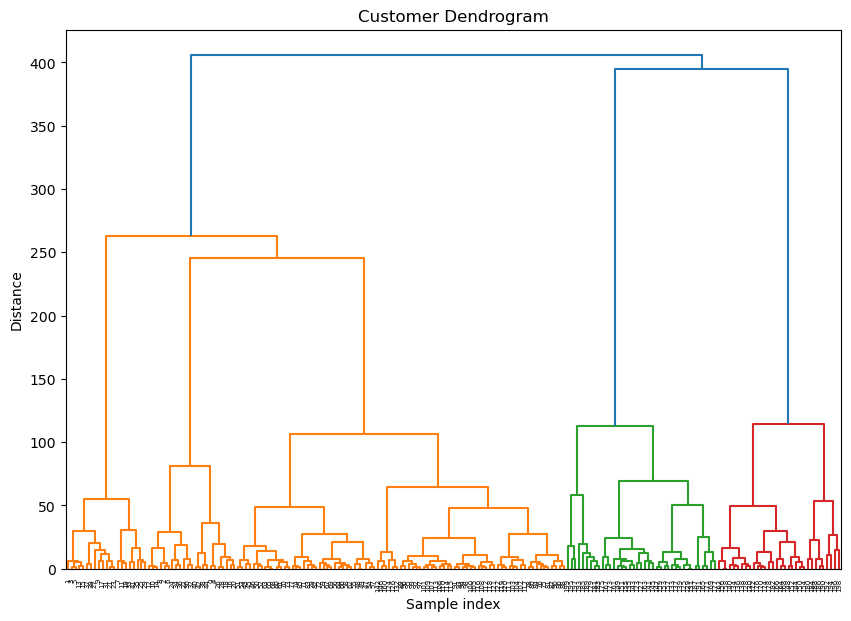

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(data, method='ward'))
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [13]:
cluster = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
labels = cluster.fit_predict(data)

In [15]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

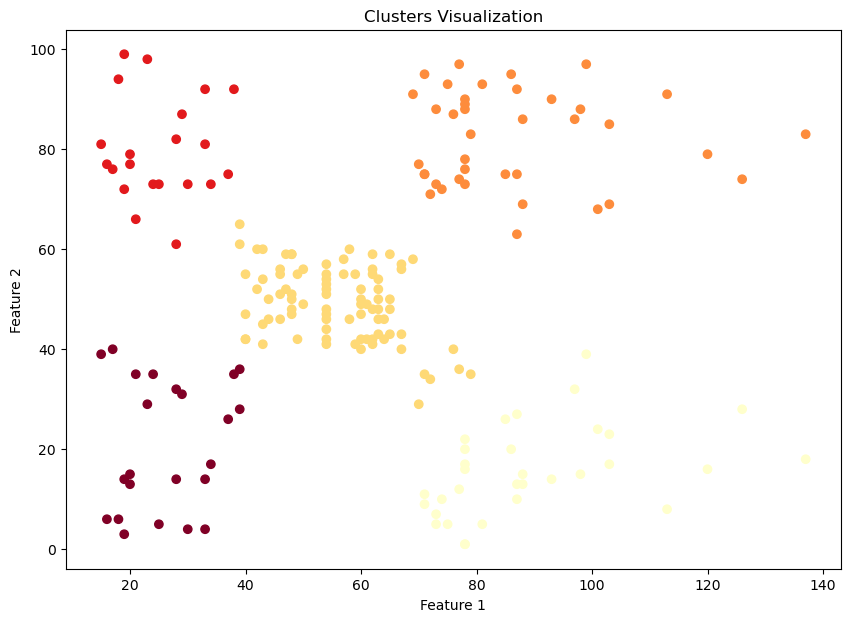

In [17]:
# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='YlOrRd')
plt.title("Clusters Visualization")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# WEEK-3_TASK-2

# t-test

In [27]:
male_test = df[df['Gender']== 'Male']['Annual Income (k$)']
male_test
Female_test = df[df['Gender']== 'Female']['Annual Income (k$)']
Female_test

2       16
3       16
4       17
5       17
6       18
      ... 
191    103
193    113
194    120
195    120
196    126
Name: Annual Income (k$), Length: 112, dtype: int64

In [61]:
t_stat, p_value = stats.ttest_ind(male_test , Female_test)
t_stat 

0.795022298602198

In [63]:
p_value

0.42755249399927864

In [67]:
significance_value = 0.05
if p_value < significance_value:
    print("Reject the null hypothesis: The average annual income between males and females is significantly different")
else:
    print("Fail to reject the null hypothesis: No significant difference in the average annual income between males and females.")

Fail to reject the null hypothesis: No significant difference in the average annual income between males and females.


# chai test

In [70]:
df['Spending Score'] = pd.cut(df['Spending Score (1-100)'],bins = 3, labels= ['Low', 'Medium', 'High'])
df['Spending Score'] 

0      Medium
1        High
2         Low
3        High
4      Medium
        ...  
195      High
196       Low
197      High
198       Low
199      High
Name: Spending Score, Length: 200, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [72]:
contigency_table = pd.crosstab(df['Gender'], df['Spending Score'])
contigency_table

Spending Score,Low,Medium,High
Gender,,,
Female,25,54,33
Male,24,40,24


In [79]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contigency_table)
chi2_stat

0.6560137762002609

In [81]:
p_value

0.7203580577897805

In [83]:
dof

2

In [85]:
expected

array([[27.44, 52.64, 31.92],
       [21.56, 41.36, 25.08]])

In [87]:
Sign_value = 0.05 
if p_value < Sign_value:
    print("Reject the null hypothesis: There is a significant association between gender and spending score categories.")
else:
    print("Fail to reject the null hypothesis: No significant association between gender and spending score categories.")

Fail to reject the null hypothesis: No significant association between gender and spending score categories.


# WEEK-3_TASK-3

# advanced visualizations

In [44]:
# heatmap
heatmap = df.select_dtypes(include = ['int64','int64'])
heatmap

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [48]:
corealation = heatmap.corr()
corealation

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


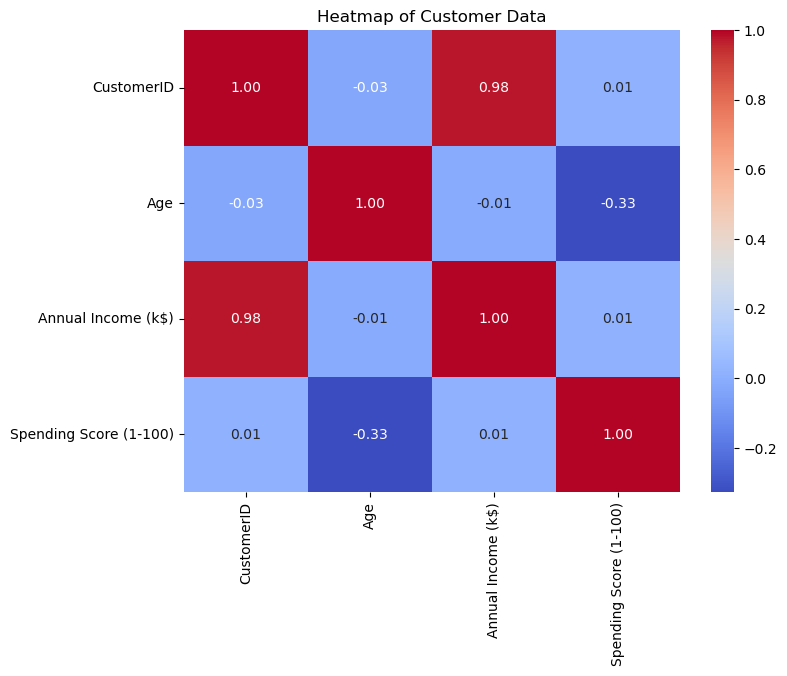

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(corealation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Customer Data')
plt.show()

In [89]:
df['Annual_Income_k$'] = pd.to_numeric(df['Annual_Income_k$'])
df['Spending_Score_1_100'] = pd.to_numeric(df['Spending_Score_1_100'])
df['Spending_Score_1_100'] 

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending_Score_1_100, Length: 200, dtype: int64

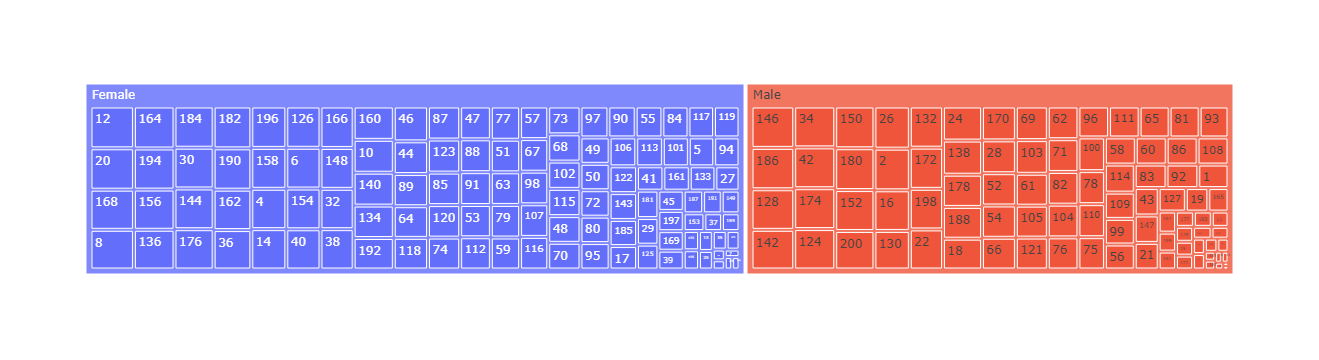

In [178]:
# Rename columns
df = df.rename(columns={'Annual Income (k$)': 'Annual_Income_k$', 'Spending Score (1-100)': 'Spending_Score_1_100'})

# Create the treemap
treemap = px.treemap(df, path=['Gender', 'CustomerID'], values='Spending_Score_1_100')

# Show the treemap
treemap.show()

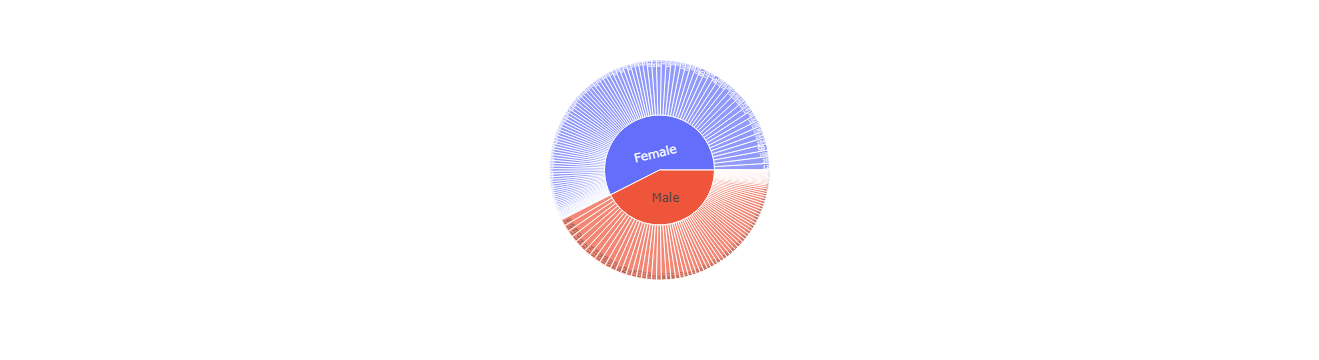

In [128]:
 # sunburst
import plotly.express as px

# Simplified Sunburst Chart
fig = px.sunburst(df, path=['Gender', 'CustomerID'], values='Spending_Score_1_100')
fig.show()

# week3-TASK-4

# text data using NLP

In [ ]:
reviews = [
    "I absolutely love this product! It works perfectly and the quality is amazing.",
    "The service was terrible. I had to wait for hours and the staff was rude.",
    "It's okay, nothing special. I expected more for the price.",
    "I'm very satisfied with my purchase. The delivery was quick and the product meets my expectations.",
    "The app keeps crashing and it's very frustrating. I wouldn't recommend it.",
    "Fantastic experience! I will definitely use this service again.",
    "The movie was boring and too long. Not worth watching.",
    "Great value for money. I'm happy with what I got.",
    "Terrible! The product broke after just one use. Waste of money.",
    "The hotel was clean and the staff were friendly. I had a pleasant stay."
]
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each review
for review in reviews:
    sentiment = sia.polarity_scores(review)
    print(sentiment)

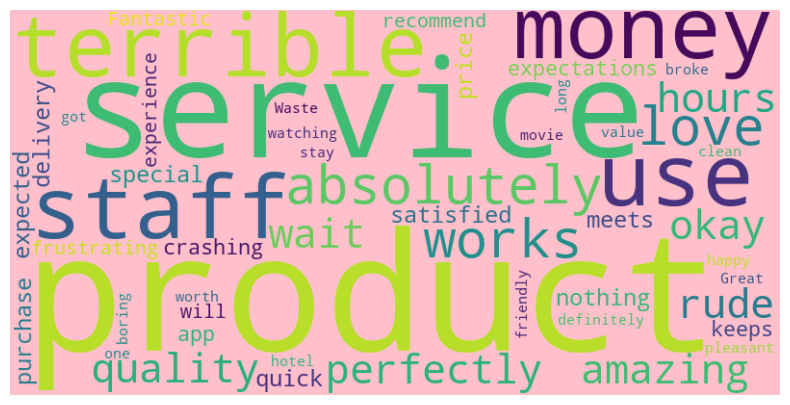

In [160]:

text = (
    "I absolutely love this product! It works perfectly and the quality is amazing. "
    "The service was terrible. I had to wait for hours and the staff was rude. "
    "It's okay, nothing special. I expected more for the price. "
    "I'm very satisfied with my purchase. The delivery was quick and the product meets my expectations. "
    "The app keeps crashing and it's very frustrating. I wouldn't recommend it. "
    "Fantastic experience! I will definitely use this service again. "
    "The movie was boring and too long. Not worth watching. "
    "Great value for money. I'm happy with what I got. "
    "Terrible! The product broke after just one use. Waste of money. "
    "The hotel was clean and the staff were friendly. I had a pleasant stay."
)

# Create a word cloud
all_reviews = " ".join(text)
wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()

In [122]:
df.dtypes

CustomerID               int64
Gender                  object
Age                      int64
Annual_Income_k$         int64
Spending_Score_1_100     int64
dtype: object

In [124]:
df.isnull().sum()

CustomerID              0
Gender                  0
Age                     0
Annual_Income_k$        0
Spending_Score_1_100    0
dtype: int64

In [2]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [17]:
import folium
import geopandas as gpd

In [61]:

m = folium.Map(location=[12.956523543600088, 77.58830750248043], zoom_start=7)

# Add a marker to the map
folium.Marker(
    [12.956523543600088, 77.58830750248043],
    popup='Bangalore',
    icon=folium.Icon(color='red',icon='home')  # Correct color
).add_to(m)

m

In [63]:
m.add_child(folium.ClickForMarker(popup = 'new place i want to visit'))
m

In [67]:
m.add_child(folium.LatLngPopup())
m

In [77]:
folium.Circle(
               radius = 500,
               color = 'blue',
               location =  [12.1220, 79.535],
               fill = True
).add_to(m)
m